# 이메일 스팸 분류하기

- 나이브 베이즈 분류기를 훈련시켜 이메일 약 5000개를 분류하도록 하는 자연어 처리는 기반으로 한 스팸 탐지기를 만든다.

# 목차

1. 데이터 읽기
2. 스팸과 햄 분류
3. 나이브 분류기를 이용한 데이터 테스트
4. 평가하기
    - 혼동 행렬
    - 평가 지표

# 데이터 읽기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
# 샘플 개수 알아보기
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
# 빈 데이터의 유무 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# 스팸과 햄 분류

In [5]:
ham = df[df['spam'] == 0]
ham.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
spam = df[df['spam'] == 1]
spam.tail()

,text,spam
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1
1367,Subject: hot stock info : drgv announces anoth...,1


In [7]:
# 단어들을 숫자화 시킨다.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
df_cv = vectorizer.fit_transform(df['text']) # text열의 단어들을 숫자로 변환
df_cv.shape

(5728, 37303)

5728개 샘플 중 37303개 단어가 추출된 것을 확인할 수 있다.

# 나이브 분류기를 이용한 데이터 테스트

In [8]:
# 나이브베이즈 불러오기
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = df['spam'].values
NB_classifier.fit(df_cv, label)

MultinomialNB()

In [9]:
# 예시를 들어보자.
sample = ['Show me the money', "Hello willy. Please report your practices."]
sample_cv = vectorizer.transform(sample)
test = NB_classifier.predict(sample_cv)
test

array([1, 0], dtype=int64)

전자는 1로 스팸, 후자는 0으로 스팸이 아닌 것을 확인할 수 있다.

In [10]:
# 훈련, 테스트로 분류 작업
X = df_cv
y = label
y.shape # X와 행렬이 맞는지 확인

(5728,)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# 평가하기

In [12]:
# 정확도 평가 지표와 혼동 행렬 불러오기
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

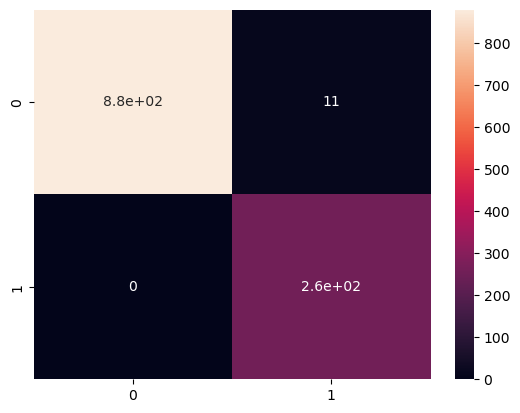

In [13]:
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

# 각각 참 값과 예측값을 넣어본다.
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

1종 오류는 2건, 2종 오류는 2건이 일어난 것을 확인할 수 있다.

In [14]:
# 평가 지표
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       891
           1       0.96      1.00      0.98       255

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



정확도가 0.99로 굉장히 높은 수치임을 증명했다.